In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt

In [2]:
# Parameters 
num_qubits = 5
shots = 1024
max_iterations = 100

In [3]:
simulator = AerSimulator()

# Noise model
noise_model = NoiseModel()
error_1q = depolarizing_error(0.001, 1)
error_2q = depolarizing_error(0.02, 2)

noise_model.add_all_qubit_quantum_error(error_1q, ['id', 'x'])
noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])

In [4]:
def create_crosstalk_circuit(iterations: int) -> QuantumCircuit:
    qc = QuantumCircuit(num_qubits, 1)
    qc.x(0)

    for _ in range(iterations):
        qc.id(0)
        qc.cx(1, 2)
        qc.cx(3, 4)

    qc.measure(0, 0)
    return qc

In [9]:
# Serching the order of the iteration when the error occure
error_iteration = None

In [11]:
for i in range(1, max_iterations + 1):
    circuit = create_crosstalk_circuit(i)
    job = simulator.run(circuit, shots=shots, noise_model=noise_model)
    result = job.result()
    counts = result.get_counts()

    error_rate = counts.get('0', 0) / shots

    if error_rate > 0.01:
        error_iteration = i
        print(f"❌ Error detected after {i} iterations (error rate = {error_rate:.2%})")
        break

if error_iteration is None:
    print(f"✅ No error detected after {max_iterations} iiterations.")

❌ Error detected after 15 iterations (error rate = 1.17%)



📌 Circle after {i} iterations:


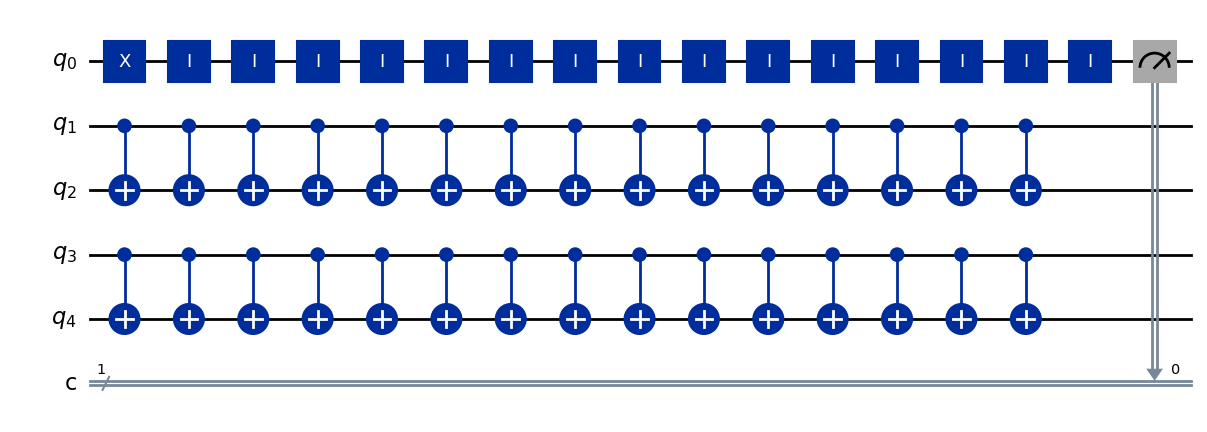

In [13]:
print("\n📌 Circle after {i} iterations:")
circuit.draw(output='mpl')